# Data Story_for_CS_project 1_data

## The questions I asked:
For phenotypic data:
1.what is min, max ,median, std value for each of the three traits?
2.Are the trait data are normal?
3.what is relationship between the traits (compare pairwise related quantities)?
4.Is there a difference between my own data and data obtained from database?

For genotypic data:
1: Are the SNPs cover the whole genome of soybean? 
2: which chromosome has largest number of marker? 
3. How was the distribution of marker distance across genome?
4. Is there any relationship between features (SNPs markers)?

# # Python code used to answer the questions I asked

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
import scipy.stats as stats

In [2]:
## combine cleaned data together: Option1 using pd.merge
cleaned_y = pd.read_csv('Yield.csv')
cleaned_p = pd.read_csv('protein.csv')
cleaned_o= pd.read_csv('oil.csv')
combined_yp = pd.merge(cleaned_y,cleaned_p,on='id',how='outer')
combined_ypo=pd.merge(combined_yp,cleaned_o,on='id',how='outer')
print(combined_ypo.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9821 entries, 0 to 9820
Data columns (total 7 columns):
Unnamed: 0_x    9815 non-null float64
id              9821 non-null object
yield           7093 non-null float64
Unnamed: 0_y    9709 non-null float64
protein         9642 non-null float64
Unnamed: 0      9680 non-null float64
oil             9613 non-null float64
dtypes: float64(6), object(1)
memory usage: 613.8+ KB
None


In [3]:
combined_ypo.head()

,Unnamed: 0_x,id,yield,Unnamed: 0_y,protein,Unnamed: 0,oil
0,0.0,PI103414,2.28,0.0,37.7,0.0,21.6
1,1.0,PI132215,1.84,1.0,39.7,1.0,20.4
2,5.0,PI153214,1.82,5.0,41.1,5.0,18.2
3,6.0,PI153229,1.74,6.0,38.3,6.0,19.5
4,7.0,PI153236,2.07,7.0,39.0,7.0,20.4


In [4]:
combined_ypo.to_csv('combined_ypo.csv')

In [5]:
## combine cleaned data together: Option 2 using reduce
dfs = [cleaned_y,cleaned_p,cleaned_o]
df_final = reduce(lambda left,right: pd.merge(left,right,on='id',how='outer'), dfs)

In [6]:
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9821 entries, 0 to 9820
Data columns (total 7 columns):
Unnamed: 0_x    9815 non-null float64
id              9821 non-null object
yield           7093 non-null float64
Unnamed: 0_y    9709 non-null float64
protein         9642 non-null float64
Unnamed: 0      9680 non-null float64
oil             9613 non-null float64
dtypes: float64(6), object(1)
memory usage: 613.8+ KB
None


#### two methods got same results

In [7]:
df_final.head()

,Unnamed: 0_x,id,yield,Unnamed: 0_y,protein,Unnamed: 0,oil
0,0.0,PI103414,2.28,0.0,37.7,0.0,21.6
1,1.0,PI132215,1.84,1.0,39.7,1.0,20.4
2,5.0,PI153214,1.82,5.0,41.1,5.0,18.2
3,6.0,PI153229,1.74,6.0,38.3,6.0,19.5
4,7.0,PI153236,2.07,7.0,39.0,7.0,20.4


In [8]:
## add a new column named as origin
origin=[]
for idx in df_final['id']:
    if idx.startswith('PI'):
        origin.append('germplasm')
    else: 
       origin.append('own_lines')


In [9]:
print(origin[:10])

['germplasm', 'germplasm', 'germplasm', 'germplasm', 'germplasm', 'germplasm', 'germplasm', 'germplasm', 'germplasm', 'germplasm']


In [10]:
df_final['origin']=origin

### Describe statistics for all data

In [11]:
df_final.head()

,Unnamed: 0_x,id,yield,Unnamed: 0_y,protein,Unnamed: 0,oil,origin
0,0.0,PI103414,2.28,0.0,37.7,0.0,21.6,germplasm
1,1.0,PI132215,1.84,1.0,39.7,1.0,20.4,germplasm
2,5.0,PI153214,1.82,5.0,41.1,5.0,18.2,germplasm
3,6.0,PI153229,1.74,6.0,38.3,6.0,19.5,germplasm
4,7.0,PI153236,2.07,7.0,39.0,7.0,20.4,germplasm


In [12]:
df_f=df_final[['id','yield','protein','oil']]

In [13]:
df_f.describe()

,yield,protein,oil
count,7093.000000,9642.000000,9613.000000
mean,2.213421,44.284157,18.581638
std,0.991092,2.481386,2.008543
min,0.030000,37.300000,13.000000
25%,1.510000,42.500000,17.300000
50%,2.080000,44.200000,18.700000
75%,2.890000,45.900000,20.100000
max,4.958000,51.200000,24.100000


### 2 Check the normal distribution for three trait ----Option 1: Graphical methods 

In [14]:
## for protein

In [15]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x= np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [16]:
mu=np.mean(df_f['protein'])
print(mu)

44.28415749022304


In [17]:
sigma=np.std(df_f['protein'])

In [18]:
np.random.seed(28041990)

In [19]:
samples=np.random.normal(mu,sigma,size=10000)

In [20]:
## for oil

In [21]:
mu_oil=np.mean(df_f['oil'])

In [22]:
sigma_oil=np.std(df_f['oil'])

In [23]:
samples_oil=np.random.normal(mu_oil,sigma_oil,size=10000)

In [24]:
## for yield

In [25]:
mu_yield=np.mean(df_f['yield'])

In [26]:
sigma_yield=np.std(df_f['yield'])

In [27]:
samples_yield=np.random.normal(mu_yield,sigma_yield,size=10000)

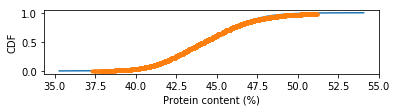

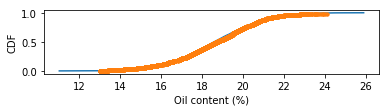

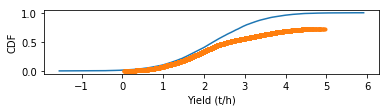

In [28]:
# Get the CDF of the samples and of the data
x_theor,y_theor=ecdf(samples)
x,y=ecdf(df_f['protein'])

# Plot the CDFs and show the plot for protein
plt.subplot(3,1,1)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Protein content (%)')
_ = plt.ylabel('CDF')
plt.show()


# Plot the CDFs and show the plot for oil
x_theor,y_theor=ecdf(samples_oil)
x,y=ecdf(df_f['oil'])
plt.subplot(3,1,2)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Oil content (%)')
_ = plt.ylabel('CDF')
plt.show()

# Plot the CDFs and show the plot for yield
x_theor,y_theor=ecdf(samples_yield)
x,y=ecdf(df_f['yield'])
plt.subplot(3,1,3)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Yield (t/h)')
_ = plt.ylabel('CDF')
plt.show()


#### except for yield, the other two traits seem like normal distribuation, but we need to use normal test to confirm.

### 2. Check the normal distribution for three trait ----Option 2: normaltest from scipy.stats

In [29]:
from scipy.stats import normaltest

In [30]:
statistic, p_val = normaltest(df_f['protein'],nan_policy='omit')

print('chi-square statistic:',statistic)
print('p value =',p_val)

chi-square statistic: 90.87627132850528
p value = 1.8470064541887026e-20


In [31]:
alpha=0.001
if p_val < alpha:  # null hypothesis: x comes from a normal distribution
 print("The null hypothesis can be rejected")
else:
 print("The null hypothesis cannot be rejected")


The null hypothesis can be rejected


In [32]:
statistic, p_val = normaltest(df_f['oil'],nan_policy='omit')

print('chi-square statistic:',statistic)
print('p value =',p_val)

chi-square statistic: 161.91036206851876
p value = 6.944030110417341e-36


In [33]:
alpha=0.001
if p_val < alpha:  # null hypothesis: x comes from a normal distribution
 print("The null hypothesis can be rejected, the data is normal distribution")
else:
 print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected, the data is normal distribution


In [34]:
statistic, p_val = normaltest(df_f['yield'],nan_policy='omit')

print('chi-square statistic:',statistic)
print('p value =',p_val)

chi-square statistic: 282.49268157357074
p value = 4.544578476324981e-62


In [35]:
alpha=0.001
if p_val < alpha:  # null hypothesis: x comes from a normal distribution
 print("The null hypothesis can be rejected")
else:
 print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


In [36]:
##No, the distribution appears to be not normally distributed based on normal test(p<0.05)

### 3.what is relationship between the traits (compare pairwise-related quantities)?

/home/wang/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


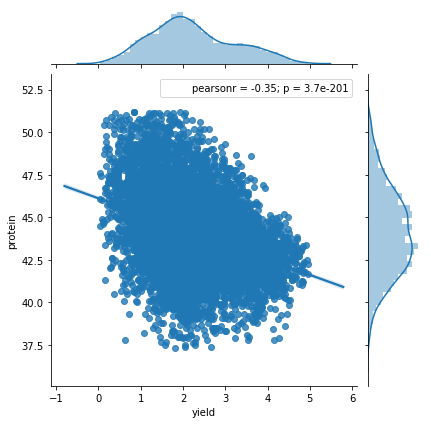

In [37]:
_=sns.jointplot(x='yield', y='protein',data=df_f,kind='reg')
_.annotate(stats.pearsonr)
plt.show()
# Display the plot
plt.show()

#### Protein and yield are neigetive correlated

/home/wang/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


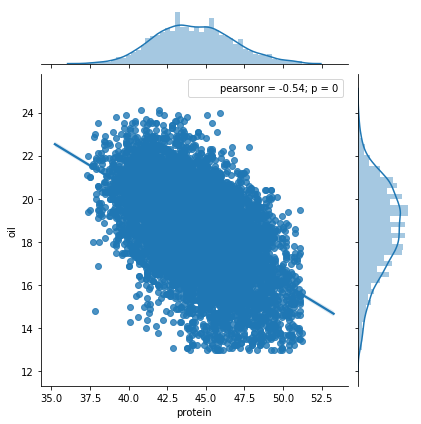

In [38]:
_=sns.jointplot(x='protein', y='oil',data=df_f,kind='reg')
_.annotate(stats.pearsonr)
plt.show()
# Display the plot
plt.show()


#### Protein and oil are neigetive correlated

/home/wang/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


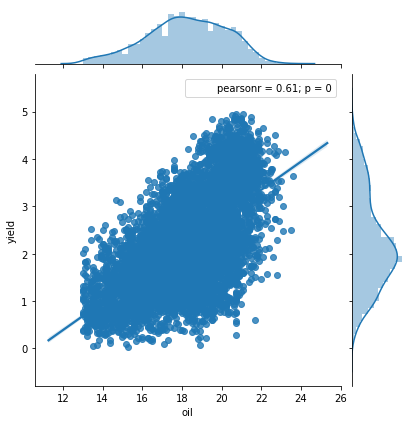

In [39]:
j=sns.jointplot(x='oil', y='yield',data=df_f,kind='reg')
j.annotate(stats.pearsonr)
plt.show()
# Display the plot
plt.show()

#### Oil and yield are possitive correlated
#### Overall relationships were shown below

/home/wang/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/wang/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


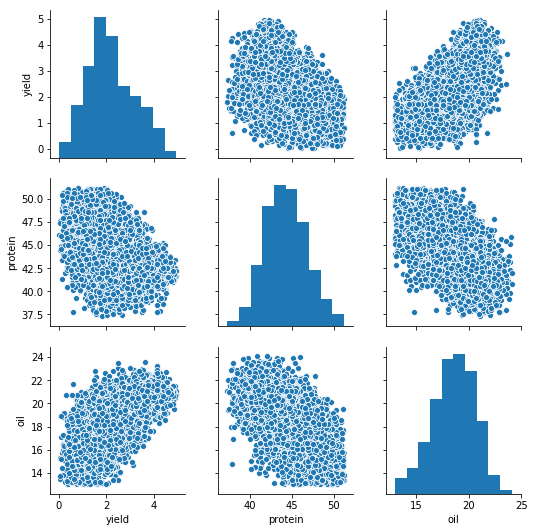

In [40]:
## Overview of all traits' relationships
sns.pairplot(df_f)

### Is there a significant difference between my own data and data obtained from database in agronomic traits?

In [41]:
df_group=df_final[['id','yield','protein','oil','origin']]

In [42]:
df_group.head()

,id,yield,protein,oil,origin
0,PI103414,2.28,37.7,21.6,germplasm
1,PI132215,1.84,39.7,20.4,germplasm
2,PI153214,1.82,41.1,18.2,germplasm
3,PI153229,1.74,38.3,19.5,germplasm
4,PI153236,2.07,39.0,20.4,germplasm


In [43]:
g_data=df_group.loc[df_group['origin']=='germplasm']

In [44]:
own_data=df_group.loc[df_group['origin']=='own_lines']

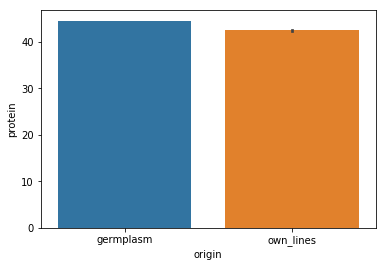

In [45]:
sns.barplot(x=df_group['origin'],y=df_group['protein'],ci=95,n_boot=10000,data=df_group)

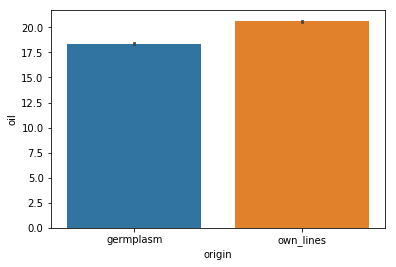

In [46]:
sns.barplot(x=df_group['origin'],y=df_group['oil'],ci=95,n_boot=10000,data=df_group)

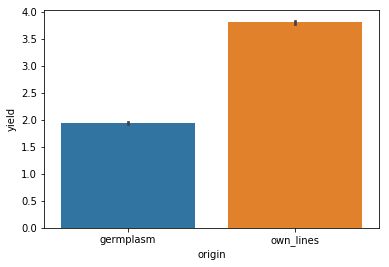

In [47]:
sns.barplot(x=df_group['origin'],y=df_group['yield'],ci=95,n_boot=10000,data=df_group)

## We saw diffierence between my own data and the public data among three traits, the significant test will be coducted in Exploratory Data section 

##  For genotypic data
### Question 1:  Are the SNP cover the whole genome of soybean?

In [48]:
df_g=pd.read_csv('new_g_sample.txt')

In [49]:
df_g

,Unnamed: 0,ltName,alleles_x,chrom_x,pos_x,PI219698,PI253651A,PI347550A,PI408055A,PI408069,PI408169A,PI408169B,PI416923,PI417472A,PI417521,PI423734,PI423923,PI424145,PI424159A,PI424241
0,0,BARC_1.01_Gm_01_24939_A_G,A/G,GM01,24952,-,A,A,A,A,G,A,A,G,A,A,A,A,A,A
1,1,BARC_1.01_Gm_01_25990_C_T,C/T,GM01,26003,-,C,C,C,C,T,C,C,T,C,C,C,C,C,C
2,2,BARC_1.01_Gm_01_29658_A_G,A/G,GM01,29671,H,A,A,A,A,G,A,A,G,A,A,A,A,A,A
3,3,BARC_1.01_Gm_01_30699_G_A,G/A,GM01,30712,G,G,G,G,G,G,G,G,A,G,G,G,G,G,G
4,4,BARC_1.01_Gm_01_37005_C_T,C/T,GM01,37018,H,C,C,C,C,T,C,C,C,C,C,C,C,C,C
5,5,BARC_1.01_Gm_01_38469_C_A,C/A,GM01,38482,C,C,C,C,C,C,C,C,A,C,C,C,C,C,C
6,6,BARC_1.01_Gm_01_46360_A_G,A/G,GM01,46373,H,A,A,A,A,G,A,A,G,A,A,A,A,A,A
7,7,BARC_1.01_Gm_01_49225_G_A,G/A,GM01,49238,H,G,G,G,G,A,G,G,G,G,G,G,G,G,G
8,8,BARC_1.01_Gm_01_61178_C_T,C/T,GM01,61191,H,C,-,C,C,T,C,C,T,C,C,C,C,C,C
9,9,BARC_1.01_Gm_01_81983_C_A,C/A,GM01,81844,H,C,C,C,C,A,C,C,A,C,C,C,C,C,C


In [50]:
chrom=df_g['chrom_x']

In [51]:
snp_counts = chrom.value_counts()

In [52]:
Marker_n=pd.DataFrame(snp_counts)

In [53]:
M_plot=Marker_n.iloc[0:20,:].sort_index()

In [54]:
M_plot_n=M_plot.reset_index()

In [55]:
M_plot_n.columns=['chrom','SNP number']

In [56]:
M_plot_n

,chrom,SNP number
0,GM01,1720
1,GM02,2414
2,GM03,1660
3,GM04,1961
4,GM05,2021
5,GM06,1947
6,GM07,2180
7,GM08,2594
8,GM09,1873
9,GM10,2205


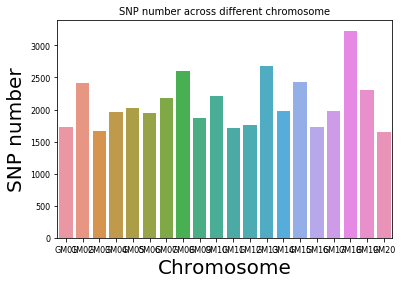

In [57]:
b=sns.barplot(x='chrom',y='SNP number',data=M_plot_n)
b.axes.set_title("SNP number across different chromosome",fontsize=10)
b.set_xlabel("Chromosome",fontsize=20)
b.set_ylabel("SNP number",fontsize=20)
b.tick_params(labelsize=8)

In [58]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x= np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [59]:
x=[]
y=[]
for i in range(1,21):
      x.append('x_'+str(i))
      y.append('y_'+str(i))

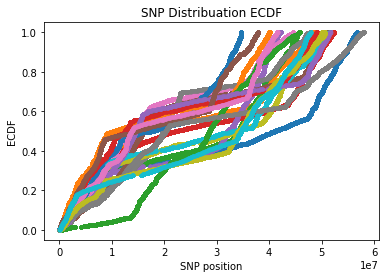

In [60]:
for i in range (0,20):
  for item in M_plot_n['chrom']:
   x[i],y[i]=ecdf(df_g[df_g.chrom_x==item].pos_x)   
   _=plt.plot(x[i],y[i],marker='.',linestyle='none')
   _=plt.title('SNP Distribuation ECDF') 
   _=plt.xlabel("SNP position")
   _=plt.ylabel('ECDF')
        

#### The chromosome 18 has large number of SNP markers (3229)

In [61]:
df_p=df_g['pos_x']

In [62]:
## Check the average distance between marker
dist_between_marker=[]
for i in range(len(df_g['pos_x'])):
  if i==42233:
    break
  elif df_g['chrom_x'][i+1]!= df_g['chrom_x'][i]:
     dist_between_marker.append(np.nan)
     continue
  dist_between_marker.append(df_g['pos_x'][i+1]-df_g['pos_x'][i])     

In [63]:
dis=pd.DataFrame(dist_between_marker)

In [64]:
dis.head()

,0
0,1051.0
1,3668.0
2,1041.0
3,6306.0
4,1464.0


In [65]:
chrom=[]
for idx in df_g['chrom_x']:
    if idx.startswith('GM'):
        chrom.append(idx)  

In [66]:
Chrom=pd.DataFrame(chrom)

In [67]:
Chrom[:10]

,0
0,GM01
1,GM01
2,GM01
3,GM01
4,GM01
5,GM01
6,GM01
7,GM01
8,GM01
9,GM01


In [68]:
Chrom['distance']=dis.iloc[:,0:42031]

In [77]:
Chrom.columns=['Chr','Distance']

In [78]:
Chrom.groupby('Chr').describe()

Distance                                                                  \
        count          mean           std     min      25%      50%       75%   
Chr                                                                             
GM01   1719.0  33045.531123  69569.732693   886.0  4955.00  14270.0  38567.00   
GM02   2413.0  20115.119768  40427.879004   427.0  2858.00   8413.0  22924.00   
GM03   1659.0  27542.624473  48431.295172   747.0  4066.00  11104.0  30212.00   
GM04   1960.0  26698.245408  39114.170668   726.0  4147.25  11617.0  34965.00   
GM05   2020.0  20882.197525  56288.011591   174.0  2200.25   7342.0  20188.75   
GM06   1946.0  26355.962487  50251.808942   141.0  2694.25  10514.0  31790.25   
GM07   2179.0  20453.975218  35173.090583   526.0  3157.00   9780.0  23135.50   
GM08   2593.0  18387.542615  40546.796118    83.0  1444.00   6653.0  21618.00   
GM09   1872.0  26663.097756  48065.050502   421.0  3961.75  11477.5  33787.75   
GM10   2204.0  23382.604356  42165.607439   115.0  2634.75   9666.5  29064.25   
GM11   1718.0  20202.346915  38943.725227    28.0  1668.50   7679.5  23750.00   
GM12   1759.0  22773.712905  45465.488322   424.0  3224.00   9014.0  23820.50   
GM13   2681.0  17076.824692  36766.279652   312.0  2505.00   6990.0  18852.00   
GM14   1971.0  24852.624556  46173.199400   467.0  3150.50   9633.0  28419.50   
GM15   2429.0  21277.079457  40807.236175   872.0  3352.00   7954.0  22133.00   
GM16   1723.0  21976.946605  39528.429544   724.0  3030.50   8299.0  23274.00   
GM17   1980.0  20992.208081  34525.583406   284.0  2180.75   7633.0  26391.00   
GM18   3228.0  17970.199195  29315.810097  1186.0  4060.50   8559.5  19828.00   
GM19   2307.0  21975.073689  34267.757673   425.0  3013.50   9550.0  27082.50   
GM20   1650.0  29011.652121  52088.426931   660.0  5078.25  14951.5  36221.50   

                 
            max  
Chr              
GM01  1961970.0  
GM02  1023340.0  
GM03   603452.0  
GM04   379485.0  
GM05  1226291.0  
GM06  1233091.0  
GM07   610279.0  
GM08  1309188.0  
GM09   934179.0  
GM10   886598.0  
GM11   644414.0  
GM12   926978.0  
GM13  1196416.0  
GM14   645588.0  
GM15   681991.0  
GM16   719942.0  
GM17   411433.0  
GM18   513926.0  
GM19   431415.0  
GM20  1541797.0

In [71]:
g_data=pd.read_csv('012format_last.csv')

/home/wang/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [72]:
g_data[:10]

,Unnamed: 0,Unnamed: 0.1,2,3,4,5,6,7,8,9,...,35210,35211,35212,35213,35214,35215,35216,35217,35218,35219
0,PI253651A,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PI347550A,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,2
2,PI408055A,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PI408069,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PI408169A,5,2,2,2,0,2,0,2,2,...,0,0,0,0,0,0,0,0,0,0
5,PI408169B,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
6,PI416923,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,PI417472A,8,2,2,2,2,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
8,PI417521,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,2
9,PI423734,10,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,0


In [73]:
g_sample=g_data.iloc[3:10]

In [ ]:
# calculate the correlation matrix
corr = g_sample.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)